# Лекция 14. Матричные функции. Введение в рандомизированные методы линейной алгебры

## На прошлой лекции

- Свёртка и преобразование Фурье
- Тёплицевы матрицы, циркулянты
- Алгоритм быстрого преобразования Фурье
- Введение в свёрточные нейронные сети

## План на сегодня

- Матричные функции
- Матричная экспонента 
- Алгоритмы вычисления матричных функций
- Рандомизированные методы

Книга по теме: [Functions of matrices by Nick Higham](http://www.google.ru/books?hl=ru&lr=&id=2Wz_zVUEwPkC&oi=fnd&pg=PR3&dq=Higham+matrix+function&ots=pTt6fpLGRX&sig=DgUuX-SpBZGin8CFUo-4MYnOcHE&redir_esc=y#v=onepage&q=Higham%20matrix%20function&f=false)

## Простейшая матричная функция: матричный полином

Матричный полином имеет очень простой вид

$$ P(A) = \sum_{k=0}^n c_k A^k. $$

[Теорема Гамильтона-Кэли](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D0%BC%D0%B8%D0%BB%D1%8C%D1%82%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%9A%D1%8D%D0%BB%D0%B8) утверждает, что $F(A) = 0$ где $F(\lambda) = \det(A - \lambda I)$.

## Матричный полином как способ построения любой матричной фугнкции

Можно определить функцию от матрицы с помощью ряда Тейлора:  

$$ f(A) = \sum_{k=0}^{\infty} c_k A^k. $$

Сходимость означает как сходимость в некоторой **матричной норме**.  

Примером такого ряда является ряд Неймана

$$ (I - F)^{-1} = \sum_{k=0}^{\infty} F^k, $$

который определён для $\rho(F) < 1$.

## Ряд для матричной экспоненты

Наиболее известной матричной функцией является **матричная экспонента**. В скалярном случае ряд выглядит следующим образом  

$$ e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \ldots = \sum_{k=0}^{\infty} \frac{x^k}{k!}, $$

и он напрямую обобщается на матричный случай:  

$$ e^A = \sum_{k=0}^{\infty} \frac{A^k}{k!}. $$

Этот ряд всегда сходится, так как выполнено следующее равенство

$$\sum_{k=0}^{\infty} \frac{\Vert A \Vert^k}{k!} = e^{\Vert A \Vert}.$$

## Почему матричная экспонента важна?

Огромное количество прикладных задач сводится к системе обыкновенных дифференциальных уравнений вида

$$ \frac{dy}{dt} = Ay, \quad y(0) = y_0. $$


## Обыкновенные дифференциальные уравнения и матричная экспонента

- Дано уравнение

$$\frac{dy}{dt} = Ay, \quad y(0) = y_0.$$

- Формально решение задаётся выражением $y(t) = e^{At} y_0$, поэтому если известна $e^{At}$ (или мы можем быстро умножить матричную экспоненту на вектор), то решение можно получить гораздо быстрее по сравнению с методами, основанными на шагах по времени  
- Действительно,

$$\frac{d}{dt} e^{At} = \frac{d}{dt} \sum_{k=0}^{\infty} \frac{t^k A^k}{k!} = \sum_{k=1}^{\infty} \frac{t^{k-1} A^{k}}{(k-1)!}  = A e^{At}.$$

## Матричная экспонента и шаги по времени

Матричная экспонента может быть гораздо лучше, чем решение с помощью, например, схемы Эйлера:

$$\frac{dy}{dt} \approx \frac{y_{k+1} - y_k}{\tau} = A y_k, \quad y_{k+1} = y_k + \tau A y_k,$$

если мы знаем как вычислить произведение матричной экспоненты на вектор, используя только произведения матрицы $A$ на вектор.

Для плотных матриц матричная экспонента даёт **точный** ответ для ОДУ в любой момент времени $t$ по сравнению с приближённым решением, полученным из схемы Эйлера или схожих подходов.

## Как вычислять матричные функции, включая матричную экспоненту?

- Существует очень много методов даже для матричной экспоненты!

- См. статью [C. Van Loan, C. Moler, Nineteen Dubious Ways to Compute the Exponential of a Matrix, Twenty-Five Years Later](http://www.cs.cornell.edu/cv/researchpdf/19ways+.pdf)

- Самый простой метод – это диагонализация матрицы:  

$$ A = S \Lambda S^{-1}, $$

где столбцы $S$ – собственные векторы матрицы $A$, тогда

$$ F(A) = S F(\Lambda) S^{-1}. $$

**Проблема: диагонализация неустойчива!** (и не любая матрица диагонализуема)

Далее короткое демо

In [1]:
import numpy as np
eps = 1e-4
p = 4
a = np.eye(p)
for i in range(p-1):
    a[i, i+1] = 1
    
a[p-1, 2] = eps
print(a)
val, vec = np.linalg.eig(a)
#print a
print(np.linalg.norm(a - vec.dot(val[:, np.newaxis] * np.linalg.inv(vec))))
#print 'S * D * S^{-1}:' 
print(vec.dot(val[:, np.newaxis] * np.linalg.inv(vec)))

[[1.e+00 1.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 1.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 1.e+00]
 [0.e+00 0.e+00 1.e-04 1.e+00]]
16384.000030517578
[[1.00000000e+00 0.00000000e+00 9.09494702e-13 1.63840000e+04]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e-04 1.00000000e+00]]


Сейчас мы вычислим матричную экспоненту с помощью диагонализации от **возмущённой Жордановой клетки**.

In [2]:
import numpy as np
eps = 1e-16
p = 5
a = np.eye(p)
for i in range(p-1):
    a[i, i+1] = 1
    
a[p-1, 0] = eps
a = np.array(a)
val, vec = np.linalg.eig(a)
print(np.linalg.norm(a - vec.dot(np.diag(val)).dot(np.linalg.inv(vec))))

fun = lambda x: np.exp(x)

#Using diagonalization
fun_diag = vec.dot(np.diag(fun(val))).dot(np.linalg.inv(vec))


#Using Schur
import scipy.linalg
fun_m = scipy.linalg.expm(a)
print('Difference = {}'.format(np.linalg.norm(fun_m - fun_diag)))

2.0
Difference = 5.959978842992802


## Как работает функция ```funm```?

- Матричная экспонента – это особая функция, и для её вычисления существуют специальные методы.  

- Для произвольной функции $F$, есть замечательный **алгоритм Шура-Парлетта**, который основан для **теореме Шура**

## Алгоритм Шура-Парлетта

- Для данной матрицы $A$ мы хотим вычислить $F(A)$, и можем вычислить $F$ только в **скалярных точках**

- Сначала сведём матрицу $A$ к **треугольной форме**  

$$ A = U T U^*. $$

- Поэтому  $F(A)=U F(T) U^*$

- Нам осталось вычислить функцию от треугольной матрицы.

## Вычисление функции от треугольных матриц

- Мы знаем значения на диагоналях

$$ F_{ii} = F(T_{ii}), $$

также мы знаем, что

$$ F T = T F, $$

то есть значение матричной функции **коммутирует** с самой матрицей. 

- Матричная функция от треугольной матрицы есть треугольная матрица.
- Используя известные значения на главной диагонали и свойство коммутативности, мы получим последовательно остальные диагонали:

$$f_{ij} = t_{ij} \frac{f_{ii} - f_{jj}}{t_{ii} - t_{jj}} + \sum_{k=i+1}^{j-1} \frac{f_{ik} t_{kj} - t_{ki}f_{kj}}{t_{ii} - t_{jj}}.$$

## Матричные функции: ещё одно определение

- Одним из способов определение матричной функции $f(A)$ является использование **канонической формы Жордана**.

- Более элегантный способ определить матричные функции – это использовать **интегральное представление Коши:**

$$
    f(A) = \frac{1}{2\pi i} \int_{\Gamma} f(z) (zI - A)^{-1} dz,
$$

где $f(z)$ аналитическая функция на границе и внутри замкнутого контура $\Gamma$, который покрывает спектр матрицы $A$.

- Определение можно обобщить на случай **операторов**

## Важные матричные функции

- Матричная экспонента используется для решения ОДУ $\frac{dy}{dt} = Ay$ в явном виде $y = e^{At}y_0.$
- $\cos(A), \sin(A)$ используются для решения волнового уравнения $\frac{d^2 y}{dt^2} + Ay = 0.$
- Функция знака, $\mathrm{sign}(A)$, используется для вычисления **спектральных проекций.**
- Обратный квадратный корень из матрицы $A^{-1/2}$ необходим в различных задачах, например, для генерирования сэмплов из нормального распределения

## И снова матричная экспонента

- Матричная функция задаётся следующим рядом:

$$e^A = I + A + \frac{1}{2} A^2 + \frac{1}{3!} A^3 + \ldots$$

- Использовать этот ряд для вычисления – плохая идея (даже для скалярного случая, почему?)

In [16]:
import numpy as np

x = -30.0 #Point
k = 1000000 #Number of terms
b = 1.0
x0 = x
for i in range(1, k):
    b += x0
    x0 *= x/(i+1)
    
print('Error in the exponent: {}'.format((b - np.exp(x))/np.exp(x)))

Error in the exponent: 65220007.32064143


## Сходимость ряда

- Сходимость ряда для матричной экспоненты может быть медленной для больших значений $x$ (то есть для большой нормы матрицы).

- Что мы можем сделать?

## Использовать Крыловские пространства

- Мы можем использовать идею Крыловских методов: с помощью метода Арнольди генерировать ортогональный базис в Крыловском подпространстве и вычислить (это можно делать в общем случае для любой функции)

$$ f(A)v \approx f(Q H Q^*)v = Q f(H) Q^*v,$$

где $H$ небольшая верхне-Гессенбергова матрица, для вычисления функции от которой мы можем использовать, например **алгоритм Шура-Парлетта**

- Сходимость Крыловского метода может быть очень медленной, так как по сути это **полиномиальная аппроксимация** матричной функции.

- А сходимость полиномиальной аппроксимации может быть **очень медленной**

- **Идея:** заменить полиномы рациональными функциями!

## Аппроксимация Паде

- Матричная экспонента хорошо приближается **рациональными функциями**:  

$$
\exp(x) \approx \frac{p(x)}{q(x)},
$$

где $p(x)$ и $q(x)$ полиномы, тогда вычисление рациональной матричной функции сводится к **матричным произведениям** и **обращаениям матриц**

- Рациональная функция также удобна в случае, когда необходимо вычислить только произведение матричной экспоненты на вектор, поскольку вычисление в этом случае сводится к **умножению матрицы на вектор** и **решению систем линейных уравнений**

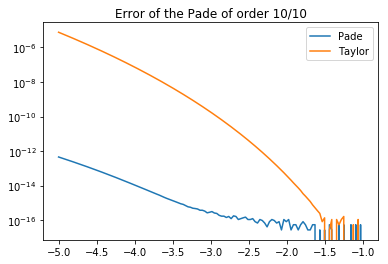

In [13]:
#Computing Pade approximant
import numpy as np
import mpmath
%matplotlib inline
from mpmath import pade, taylor, polyval
import matplotlib.pyplot as plt
x = np.linspace(-5, -1, 128)
a = taylor(mpmath.exp, 0, 20) #Taylor series
k1 = 10
k2 = 10
p, q = pade(a, k1, k2) #Pade approximant
plt.plot(x, polyval(p[::-1], x)/polyval(q[::-1], x) - np.exp(x), label="Pade")
plt.semilogy(x, polyval(a[::-1], x) - np.exp(x), label="Taylor")
plt.legend()
_ = plt.title('Error of the Pade of order {0:d}/{1:d}'.format(k1, k2) )

## Алгоритм scaling & squaring 

Канонический алгоритм вычисления матричной экспоненты опирается на масштабирование (scaling) матрицы $A$:

$$\exp(A) = \exp(A/2^k)^{(2^k)}.$$

В этом случае матрица имеет малую норму, что приводит к следующему алгоритму:

- Получить матрицу $B := A/2^k$ с нормой меньше 1 – шаг scaling
- Вычислить матричную экспоненту $C = e^B$ с помощью аппроксимации Паде
- Получить $e^A \approx C^{(2^k)}$ с помощью $k$ матричных произведений – шаг squaring

## Матричная экспонента для матриц большой размерности

- Для матриц большого размера нельзя использовать алгоритм scaling-squaring, так как в нём надо работать с плотными матрицами, поэтому мы можем использовать Крыловские методы или (что лучше) **рациональные** Крыловские методы

- Идея рациональных Крыловских методов опирается на идею рациональной аппроксимации вместо полиномиальной

- Обычные Крыловские методы опираются на полиномиальную аппроксимацию

## Рациональные Крыловские подпространства

- Простой и эффективный подход основан на, так называемых, **расширенных Крыловских подпространствах**:

$$KE(A, b) = \mathrm{Span}(\ldots, A^{-2} b, A^{-1} b, b, A b, A^2 b, \ldots)$$

- На каждом шаге добавляется векторы вида $A w$ и $A^{-1} w$ в подпространство и результат ортогонализуется (**рациональный метод Арнольди**).

- То есть нам нужно только решить одну линейную систему на каждом шаге, но если матрица не меняется её можно один раз факторизовать и использовать факторизацию на всех последующих итерациях.

## Рациональный Крыловский метод

Рациональные Крыловские методы являются наиболее эффективными для вычисления произведения матричной функции на вектор:

- Построим ортогональный базис в пространстве

$$KE(A, b) = \mathrm{Span}(\ldots, A^{-2} b, A^{-1} b, b, A b, A^2 b, \ldots)$$

- И вычислим

$$f(A)b \approx Q f(H) Q^*b,$$

где $H = Q^* A Q.$

Этот метод требует одного решения линейной системы и умножения матрицы на вектор на каждой итерации.

## Обратный квадратный корень матрицы

- Обратный квадратный корень матрицы $A^{-1/2}$ – полезная матричная функция.

- Многомерное нормальное распределение с ковариационной матрицей $A = A^* > 0$ задаётся с помощью 

$$e^{A^{-1} x, x}.$$

- Пусть $x$ вектор большой размерности (миллионы), как сгенерировать сэмпл из нормального распределения с данной **структурированной** ковариационной матрицей $A$?

- Простейший алгоритм – это сгенерировать вектор $y$ из стандартного нормального распределения, а затем вычислить 

$$x = A^{-\frac{1}{2}} y.$$

- Таким образом, вектор $x$ будет из соответствующего распределения.

- Рациональные Крыловские подпространства особо эффективны для вычисления квадратного корня из матрицы

## Применение к вычислению расстояний между многообразиями

- Представим два многообразия $\mathcal{M}$ и $\mathcal{N}$ как облака точек
- Построим два графа из этих облаков точек
- Для каждого графа можно построить свой Лапласиан ($L_{\mathcal{M}}$ и $L_{\mathcal{N}}$) (вспомните лекцию о векторе Фидлера!)
- Heat kernel trace 

$$\mathrm{hkt}_{\mathcal{M}}(t) = \mathrm{trace}(\exp(-t L_{\mathcal{M}}))$$

содержит всю информацию о спектре графа

- Расстояние Громова-Вассерштайна между многообразиями $\mathcal{M}$ и $\mathcal{N}$:

$$d_{GW}(\mathcal{M}, \mathcal{N}) \geq \sup_{t > 0} \exp(-2(t + t^{-1}))|\mathrm{hkt}_{\mathcal{M}}(t) - \mathrm{hkt}_{\mathcal{N}}(t)|$$

### Стохастическая оценка следа

- Hutchinson [предложил](https://www.tandfonline.com/doi/abs/10.1080/03610919008812866) следующий метод для оценки следа матрицы

$$ \mathrm{trace}(A) = \mathbb{E}_{p(x)}(x^{\top}Ax), $$

где $p(x)$ некоторое распределение с нулевым средним и единичной дисперсией, например стандартное нормальное распределение или распределение Радемахера

- Для оценки следа нам нужно уметь быстро умножать матрицу на вектор!
- И тут рациональные Крыловские подпространства вступают в игру, так как $\mathrm{hkt}$ требует вычисления следа от матричной экспоненты

### Расстояние между языками ([картинка из статьи](https://openreview.net/pdf?id=HyebplHYwB))

<img src="./gw_matexp.png">

## Для каких задач рандомизированные методы также могут помочь?

- SVD
- Решение линейных систем
- Умножение матриц

## Рандомизированный метод вычисления SVD ([Halko et al, 2011](https://epubs.siam.org/doi/pdf/10.1137/090771806?casa_token=isi3yX3QdPEAAAAA:j-7Qk87vS0kjKqGMLYeX3xg4QxqqyM8s4wn-XGX-SLOS2BRChFDRTPX-x9Hf7ltfuZYg9xsA0zksw1U))

- Напомним постановку задачи

$$ A \approx U\Sigma V^\top, $$

где $A$ размера $m \times n$, $U$ размера $m \times k$ и $V$ размера $n \times k$.

- Мы уже показывали ранее, что сложность вычисления приближения ранга $k$ составляет $O(mnk)$
- Как можно уменьшить эту сложность?

- Пусть мы знаем ортогональную матрицу $Q$ размера $m \times k$ такую что

$$A \approx Q Q^{\top}A $$

- Другими словами столбцы $Q$ являются базисом в пространстве столбцом матрицы $A$
- Тогда следующие детерминированные шаги помогут вычислить факторы $U$, $\Sigma$ и $V$, соответствующие факторам из SVD для матрицы $A$
    - Сформировать $k \times n$ матрицц $B = Q^{\top}A$
    - Вычислить SVD от матрицы $B = \hat{U}\Sigma V^{\top}$ небольшого размера
    - Обновить левые сингулярные векторы $U = Q\hat{U}$
    
- Если $k \ll \min(m, n)$ тогда эти шаги можно выполнить быстро
- Если $Q$ образует точный базис в пространстве столбцов матрицы $A$, тогда $U$, $\Sigma$ и $V$ также являются точными факторами из SVD исходной матрицы!
- Итак, как сгенерировать матрицу $Q$?

### Рандомизированное приближение базиса в пространсте столбцов матрицы $A$

- Основной подход
    - Сгенерировать $k + p$ случайных гауссовых векторов размерности $m$ и сформировать матрицу $G$
    - Вычислить $Y = AG$
    - Вычислить QR разложение $Y$ и использовать матрицу $Q$ как аппроксимацию базиса
- Параметр $p$ называется параметров сэмплирования и необходим для повышения точности приближения ведущих $k$ левых сингулярных вектров в дальнейших преобразованиях
- Вычисление $Y$ может выполнено параллельно
- Нам нужна только функция умножения матрицы на вектор, а не сами элементы матрицы – вспомните про концепцию чёрного ящика!
- Вместо гауссовой случайной матрицы можно использовать более структурированные, но по-прежнему случайные матрицы, что позволит выполнить умножение на $A$ быстрее

Error from randomized SVD 1406.5506347825522
Error from exact SVD 1206.4459662873328


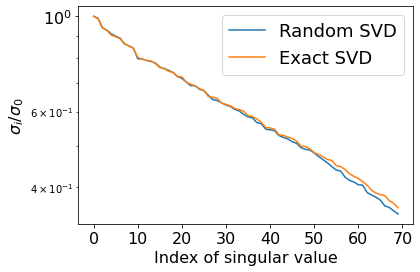

In [107]:
import numpy as np

n = 1000
k = 100
m = 200
# Lowrank matrix
A = np.random.randn(n, k)
B = np.random.randn(k, m)
A = A @ B

# Random matrix
# A = np.random.randn(n, m)

def randomized_svd(A, rank, p):
    m, n = A.shape
    G = np.random.randn(n, rank + p)
    Y = A @ G
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
    u, S, V = np.linalg.svd(B)
    U = Q @ u
    return U, S, V

rank = 70
p = 20
U, S, V = randomized_svd(A, rank, p)
print("Error from randomized SVD", np.linalg.norm(A - U[:, :rank] * S[None, :rank] @ V[:rank, :]))
plt.semilogy(S[:rank] / S[0], label="Random SVD")
u, s, v = np.linalg.svd(A)
print("Error from exact SVD", np.linalg.norm(A - u[:, :rank] * s[None, :rank] @ v[:rank, :]))
plt.semilogy(s[:rank] / s[0], label="Exact SVD")
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("$\sigma_i / \sigma_0$", fontsize=16)
_ = plt.xlabel("Index of singular value", fontsize=16)

In [111]:
import scipy.sparse.linalg as spsplin
# !pip install fbpca
# More details about Facebook package for computing randomized SVD is here: https://research.fb.com/blog/2014/09/fast-randomized-svd/ 
import fbpca
n = 1000
m = 200
A = np.random.randn(n, m)
k = 10
p = 10
%timeit spsplin.svds(A, k=k)
%timeit randomized_svd(A, k, p)
%timeit fbpca.pca(A, k=k, raw=False) 

9.47 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.65 ms ± 57.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.36 ms ± 81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Теорема сходимости

Усреднённая ошибка аппроксимации с помощью предложенного алгоритма, где $k$ ранг аппроксимации и $p$ параметр сэмплирования:

- во фробениусовой норме

$$ \mathbb{E}\|A - QQ^{\top}A \|_F \leq \left( 1 + \frac{k}{p-1} \right)^{1/2}\left( \sum_{j=k+1}^{\min(m, n)} \sigma^2_j \right)^{1/2}  $$

- в спектральной норме

$$ \mathbb{E}\|A - QQ^{\top}A \|_2 \leq \left( 1 + \sqrt{\frac{k}{p-1}} \right)\sigma_{k+1} + \frac{e\sqrt{k+p}}{p}\left( \sum_{j=k+1}^{\min(m, n)} \sigma^2_j \right)^{1/2} $$

Матожидание вычисляется по распределению, из которого генерируется случайная матрица $G$ в методе выше.

Сравните эти оценки с результатом теоремы Экхарта-Янга. Являются ли эти оценки точными?



## Повышение точности в рандомизированном методе вычисления SVD

- Основная идея: степенной метод
- Если $A = U \Sigma V^\top$, тогда $A^{(q)} = (AA^{\top})^qA = U \Sigma^{2q+1}V^\top $, где $q$ некоторое небольшое натуральное число, например 1 или 2
- Тогда мы сэмплируем базис для $A^{(q)}$ а не для $A$

$$ Y = (AA^{\top})^qAG \qquad Q, R = \mathtt{qr}(Y) $$

- Основная причина: если сингулярные значения $A$ убывали медленно, то сингулярные значения $A^{(q)}$ будут убывать быстрее

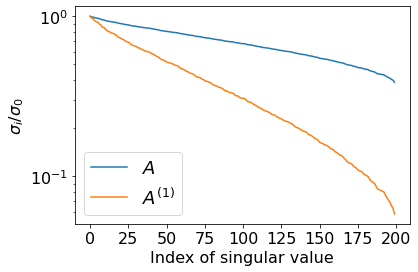

In [115]:
n = 1000
m = 200
A = np.random.randn(n, m)
s = np.linalg.svd(A, compute_uv=False)
Aq = A @ A.T @ A
sq = np.linalg.svd(Aq, compute_uv=False)
plt.semilogy(s / s[0], label="$A$")
plt.semilogy(sq / sq[0], label="$A^{(1)}$")
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("$\sigma_i / \sigma_0$", fontsize=16)
_ = plt.xlabel("Index of singular value", fontsize=16)

### Потеря точности из-за ошибок округления

- Наивное формирование $A^{(q)}$ приводит к росту числа обусловленности и потере точности

**Q:** как можно исправить эту проблему?

**A:** последовательная ортогонализация!

Error from randomized SVD 286.78254212536973
Error from more accurate randomized SVD 250.30918436760263
Error from exact SVD 249.43968443603225


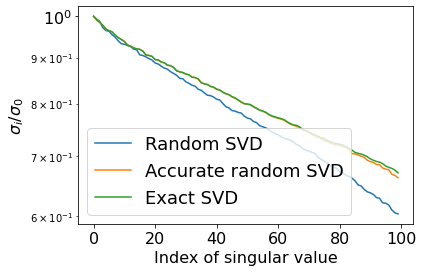

In [125]:
def more_accurate_randomized_svd(A, rank, p, q):
    m, n = A.shape
    G = np.random.randn(n, rank + p)
    Y = A @ G
    Q, _ = np.linalg.qr(Y)
    for i in range(q):
        W = A.T @ Q
        W, _ = np.linalg.qr(W)
        Q = A @ W
        Q, _ = np.linalg.qr(Q)
    B = Q.T @ A
    u, S, V = np.linalg.svd(B)
    U = Q @ u
    return U, S, V

n = 1000
m = 200
A = np.random.randn(n, m)

rank = 100
p = 20
U, S, V = randomized_svd(A, rank, p)
print("Error from randomized SVD", np.linalg.norm(A - U[:, :rank] * S[None, :rank] @ V[:rank, :]))
plt.semilogy(S[:rank] / S[0], label="Random SVD")

Uq, Sq, Vq = more_accurate_randomized_svd(A, rank, p, 5)
print("Error from more accurate randomized SVD", np.linalg.norm(A - Uq[:, :rank] * Sq[None, :rank] @ Vq[:rank, :]))
plt.semilogy(Sq[:rank] / Sq[0], label="Accurate random SVD")

u, s, v = np.linalg.svd(A)
print("Error from exact SVD", np.linalg.norm(A - u[:, :rank] * s[None, :rank] @ v[:rank, :]))
plt.semilogy(s[:rank] / s[0], label="Exact SVD")
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("$\sigma_i / \sigma_0$", fontsize=16)
_ = plt.xlabel("Index of singular value", fontsize=16)

In [126]:
%timeit spsplin.svds(A, k=k)
%timeit fbpca.pca(A, k=k, raw=False)
%timeit randomized_svd(A, k, p) 
%timeit more_accurate_randomized_svd(A, k, p, 1)
%timeit more_accurate_randomized_svd(A, k, p, 2)
%timeit more_accurate_randomized_svd(A, k, p, 5)

9.05 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.4 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.17 ms ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.29 ms ± 97.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.23 ms ± 55.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.59 ms ± 309 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Теорема сходимости

Представленный выше метод обеспечивает следующую верхнюю границу

$$ \mathbb{E}\|A - QQ^{\top}A \|_2 \leq \left[\left( 1 + \sqrt{\frac{k}{p-1}} \right)\sigma^{2q+1}_{k+1} + \frac{e\sqrt{k+p}}{p}\left( \sum_{j=k+1}^{\min(m, n)} \sigma^{2(2q+1)}_j \right)^{1/2}\right]^{1/(2q+1)} $$

Рассмотрите наихудший случай, когда в данной матрице нет малоранговой структуры.

**Q:** какова степень субоптимальности по сравнению с теоремой Экхарта-Янга? 

### Резюме по рандомизированному методу для вычисления SVD

- Эффективный метод получения приближённого SVD
- Простой в реализации
- Его можно расширить до однопроходного метода, когда матрица $ A $ нужна только для построения $ Q $
- Требуется только функция умножения данной матрицы на вектор

## Метод Качмарча для решения линейных систем 

- Мы уже обсуждали как решать переопределённые линейные системы вида $Ax = f$ в смысле задачи наименьших квадратов
    - псевдообратная матрица
    - QR разложение
- Другой подход основан на последовательном проектировании также известен как **метод Качмарча** или **техника алгебраического восстановления** в области вычислительной томографии
- Вместо решения всех уравнений, выберем случайно одно

$$a^{\top}_i x = f_i,$$

и при условии имеющейся аппроксимации $x_k$ найдём $x_{k+1}$ как решение следующей задачи оптимизации

$$x_{k+1} = \arg \min_x \frac12 \Vert x - x_k \Vert^2_2, \quad \mbox{s.t.} \quad  a^{\top}_i x = f_i.$$

- Простой анализ даёт следующую формулу обновления 

$$x_{k+1} = x_k - \frac{(a_i, x_k) - f_i}{(a_i, a_i)} a_i. $$

- Такое вычисление следующей точки быстрое, однако анадлиз сходимости такого метода довольно непрост
- Вы можете распознать в этом методе метод стохастического градиентного спуска с размером шага $\frac{1}{\|a_i\|_2^2}$ для каждого сэмпла

## Теорема сходимости

- Предположим мы генерируем индекс строки $i$ из всех доступных строк в соответствии с распределением порождённым нормами строк матрицы, то есть $\mathbb{P}[i = k] = \frac{\|a_k\|_2^2}{\| A \|^2_F}$. Этот метод называется рандомизированны метод Качмарча (Randomized Kaczmarz method or RKM)
- Почему стратегия сэмплирования важна?
- Исследование наилучшего сэмплинга приведено [здаесь](https://scholar.harvard.edu/files/yuelu/files/randkac_globalsip14.pdf)
- Если переопределённая система **совместна**, тогда

$$ \mathbb{E}[\|x_{k+1} - x^*\|^2_2] \leq \left(1 - \frac{1}{\kappa^2_F(A)}\right) \mathbb{E}[\|x_{k} - x^*\|^2_2], $$

где $\kappa_F(A) = \frac{\| A \|_F}{\sigma_{\min}(A)}$ и $\sigma_{\min}(A)$ минимальное ненулевое сингулярное число матрицы $A$. Этот результат был получен в работе ([Strohmer and Vershynin, 2009](http://people.eecs.berkeley.edu/~brecht/cs294docs/week1/09.Strohmer.pdf))

- Если переопределённая система **несовместна**, то

$$ \mathbb{E}[\|x_{k+1} - x^*\|^2_2] \leq \left(1 - \frac{1}{\kappa^2_F(A)}\right) \mathbb{E}[\|x_{k} - x^*\|^2_2] + \frac{\|r^*\|_2^2}{\| A \|^2_F}, $$

где $r^* = Ax^* - f$

### Несовместные переопределённые линейные системы

- В работе ([Needell, 2010](https://arxiv.org/pdf/0902.0958.pdf))  было показно, что RKM не сходится к точному решению $A^{\dagger}f$
- Для решения этой проблемы был предложен рандомизированный расширенный метод Качмарча (Randomized extended Kaczmarz method) в работе ([A Zouzias, N Freris, 2013](https://arxiv.org/pdf/1205.5770.pdf))
- Основная идея – использовать два шага метода RKM:
    - первый для системы $A^\top z = 0$ начиная с $z_k$
    
    $$ z^{k+1} = z^{k} - \frac{a^\top_{:, j} z^k}{\| a_{:, j} \|_2^2}a_{:, j}  $$ 
    
    - второй шаг для системы $Ax = f - z_{k+1}$ начиная с $x_k$
    
    $$x^{k+1} = x^k - \frac{a_{i,:}x_k - f_i + z^{k+1}_i}{\|a_{i,:}\|_2^2}a^{\top}_{i,:} $$
    
Здесь $a_{:, j}$ обозначает $j$-ый столбец $A$ и $a_{i, :}$ обозначает $i$-ую строку $A$

- Если $z^0 \in f + \mathrm{range}(A)$ и $x^0 \in \mathrm{range}(A^\top)$, тогда REK сходится линейно к $A^{\dagger}f$ 

## Сэмплирование и сктечинг

- Сэмплирование строки мподно рассматривать как частный случай более общего подхода под названием **скетчинг**
- Идея: заменить матрицу $A$ другой матрицей $SA$, где $SA$ имеет существенно меньше строк, но сохраняют важные свойства исходной матрицы $A$
- Возможные варианты:
    - случайные проекции
    - случайный выбор строк
- Пример: линейная задача наименьших квадратов $\|Ax - b\|_2^2 \to \min_x$ превращается в $\| (SA)y - Sb \|_2^2 \to \min_y$ и мы ожидаем, что $x \approx y$
- Солвер [Blendenpick](https://pdos.csail.mit.edu/~petar/papers/blendenpik-v1.pdf) основан на этом подходе и превосходит функцию в LAPACK! 
- Более подробно можно посмотреть в книге [Sketching as a Tool for Numerical Linear Algebra](https://researcher.watson.ibm.com/researcher/files/us-dpwoodru/wNow3.pdf), D. Woodruff

### Резюме по рандомизированным методам решения линейных систем

- Простое в использовании семейство методов
- Особенно полезно в задачах с потоковой передачей данных
- Существуют теоретические границы сходимости
- Различные интерпретации в разных областях (SGD в глубоком обучении, ART в компьютерной томографии)

## Рандомизированное матричное умножение

- Мы знаем, что сложность умножения матриц $AB$ равна $O(mnp)$ для матриц $m \times p$ и $p \times n$
- Мы можем построить приближение этого произведения с помощью сэмплирования строк и столбцов сомножителей

**Q:** как их сэмплировать?

**A:** использовать вероятности пропорциональные нормам!

- Итак, итоговое выражение для приближённого матричного умножения

$$ AB \approx \sum_{t=1}^k \frac{1}{kp_{i_t}} A^{(i_t)} B_{(i_t)}, $$

где $A^{(i_t)}$ – столбец $A$ и $B_{(i_t)}$ – строка $B$

- Снижение сложности с $O(mnp)$ до $O(mnk)$

In [174]:
import numpy as np

n = 20
p = 1000
m = 20
A = np.random.randn(n, p)
B = np.random.randn(p, m)
C = A @ B

def randomized_matmul(A, B, k):
    p = np.linalg.norm(A, axis=0) * np.linalg.norm(B, axis=1)
    p = p.ravel() / p.sum()
    n = A.shape[1]
    idx = np.random.choice(np.arange(n), (k,), False, p)
    d = 1 / np.sqrt(k * p[idx])
    A_sketched = A[:, idx] * d[None, :]
    B_sketched = B[idx, :] * d[:, None]
    C = A_sketched @ B_sketched
    return C

def randomized_matmul_topk(A, B, K):
    
    norm_mult = np.linalg.norm(A,axis=0) * np.linalg.norm(B,axis=1)
    top_k_idx = np.sort(np.argsort(norm_mult)[::-1][:K])
    
    A_top_k_cols = A[:, top_k_idx]
    B_top_k_rows = B[top_k_idx, :]

    C_approx = A_top_k_cols @ B_top_k_rows
    return C_approx

num_items = 300
C_appr_samples = randomized_matmul(A, B, num_items)
C_appr_topk = randomized_matmul_topk(A, B, num_items)
print(np.linalg.norm(C_appr_topk - C) / np.linalg.norm(C))
print(np.linalg.norm(C_appr_samples - C) / np.linalg.norm(C))

0.7514219112352372
1.496214137738649


## Ошибка аппроксимации

$$\mathbb {E} [\| AB - CR \|^2_F] = \frac {1} {k} \left (\sum_ {i = 1} ^ n \| A ^ {(i)} \| _2 \| B_{(i)} \|_2 \right)^2 - \frac {1} {k} \| AB \|_F ^ 2 $$

- Возможны другие способы выбора вероятностей
- Используя приближение

$$ AB \approx ASD (SD)^\top B = ACC^{\top} B $$

можно заменить сэмплирование и шкалирование другой матрицей, которая

- снижает размерность
- достаточно точно аппроксимирует

**Q:** какие матрицы можно использовать?

### Резюме по методам приближённого вычисления матричного произведения

- Простой способ получить приблизительный результат
- Можно использовать, если не важна высокая точность
- Особенно полезно для больших плотных матриц.

## Резюме

- Матричная функция: матричная экспонента, методы для её вычисления, другие матричные функции
- Рациональные пространства Крылова
- Рандомизированный метод вычисления SVD и другие примеры рандомизированных методов в вычислительной линейной алгебре

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()